In [24]:
import numpy as np
from hmmlearn import hmm
import pandas as pd
import matplotlib.pyplot as plt



# Create a DataFrame
df = pd.read_csv("Daily activity metrics.csv", parse_dates=['Date'])





In [25]:
# Extract the time series (Step count)
time_series = df['Step count'].values.reshape(-1, 1)



In [34]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(time_series)


GaussianHMM(covariance_type='full', n_components=3, n_iter=100)

In [32]:
# Predict the hidden states
hidden_states = model.predict(time_series)

# Add the predicted states to the DataFrame
df['hidden_state'] = hidden_states


,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms),hidden_state
count,450,445.000000,450.000000,449.000000,327.000000,327.000000,448.000000,448.000000,448.000000,450.000000,14.000000,14.000000,14.000000,3.300000e+01,3.900000e+02,25.000000,2.100000e+01,450.000000
mean,2023-03-15 11:59:59.999999744,70.853933,1444.428047,3144.210812,19.079511,19.015291,0.493259,1.327602,0.264433,5242.166667,51.607144,51.628572,51.585715,1.037353e+06,3.472145e+06,137907.400000,9.110952e+05,1.011111
min,2022-08-03 00:00:00,1.000000,617.878588,3.014135,1.000000,1.000000,0.281566,0.301413,0.245451,11.000000,50.450001,50.450001,50.450001,6.766100e+04,2.630000e+03,67653.000000,5.500000e+05,0.000000
25%,2022-11-23 06:00:00,30.000000,1341.999868,1083.557007,8.500000,8.500000,0.410602,1.166626,0.251178,2010.750000,51.375000,51.450000,51.299999,5.752450e+05,1.026625e+06,69950.000000,7.720000e+05,0.000000
50%,2023-03-15 12:00:00,66.000000,1439.960397,2909.428369,17.000000,17.000000,0.490004,1.341383,0.257383,4909.000000,51.900002,51.900002,51.900002,8.181750e+05,3.359392e+06,84622.000000,9.380000e+05,1.000000
75%,2023-07-05 18:00:00,102.000000,1517.775857,4795.102011,27.000000,27.000000,0.571679,1.490319,0.271272,7737.250000,51.900002,51.900002,51.900002,1.348020e+06,5.068511e+06,177289.000000,9.980000e+05,1.000000
max,2023-10-26 00:00:00,249.000000,1858.123257,11735.456966,72.000000,72.000000,0.806128,3.139060,0.639362,18782.000000,52.099998,52.099998,52.099998,4.029904e+06,1.317092e+07,649050.000000,1.256000e+06,4.000000
std,NaN,49.050340,122.325767,2366.293253,13.647393,13.568156,0.106623,0.367571,0.023730,3753.861811,0.545209,0.550774,0.551372,8.100843e+05,2.702345e+06,122855.743599,1.754163e+05,1.115735


In [28]:
df['Step count'][df['hidden_state'] == 0]

1      3125
2       616
3       506
4      3610
5      1828
       ... 
437    1056
438    1525
444    1242
446    1128
447     422
Name: Step count, Length: 174, dtype: int64

In [29]:
df['Date'][df['hidden_state'] == 0]

1     2022-08-04
2     2022-08-05
3     2022-08-06
4     2022-08-07
5     2022-08-08
         ...    
437   2023-10-14
438   2023-10-15
444   2023-10-21
446   2023-10-23
447   2023-10-24
Name: Date, Length: 174, dtype: datetime64[ns]

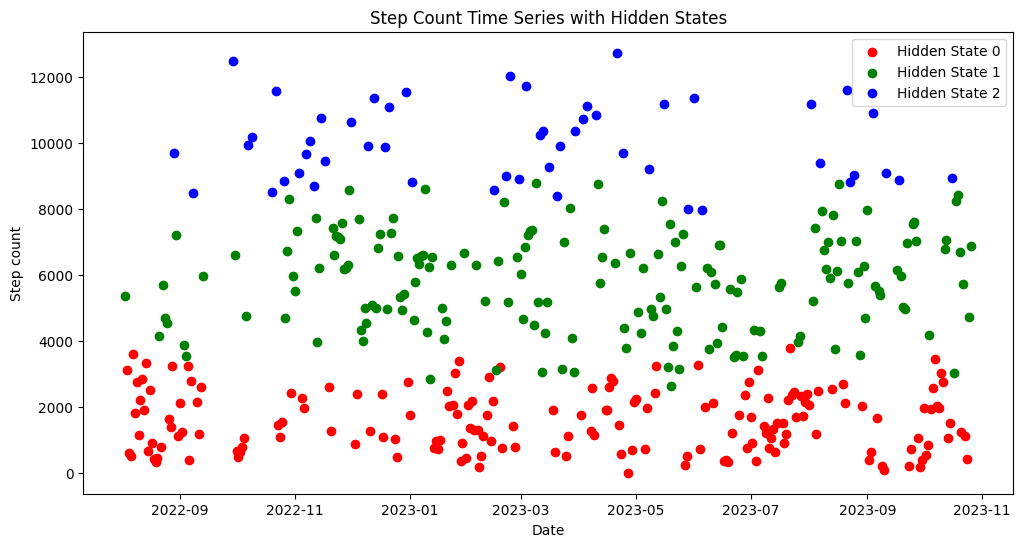

In [38]:

# Visualize the time series and hidden states
plt.figure(figsize=(12, 6))
# plt.plot(df['Date'], df['Step count'], label='Step count', linestyle='-', marker='o')
plt.scatter(df['Date'][df['hidden_state'] == 0], df['Step count'][df['hidden_state'] == 0], color='r', label='Hidden State 0')
plt.scatter(df['Date'][df['hidden_state'] == 1], df['Step count'][df['hidden_state'] == 1], color='g', label='Hidden State 1')
plt.scatter(df['Date'][df['hidden_state'] == 2], df['Step count'][df['hidden_state'] == 2], color='b', label='Hidden State 2')
# plt.scatter(df['Date'][df['hidden_state'] == 3], df['Step count'][df['hidden_state'] == 3], color='y', label='Hidden State 1')
plt.title('Step Count Time Series with Hidden States')
plt.xlabel('Date')
plt.ylabel('Step count')
plt.legend()
plt.show()

### State 0: Sedentary (e.g., sitting or not moving much)
### State 1: Walking
### State 2: Running

Epoch 1/50
45/45 [==============================] - 2s 3ms/step - loss: 0.0414
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0298
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 9/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 11/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 12/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 13/50
45/45 [==============================

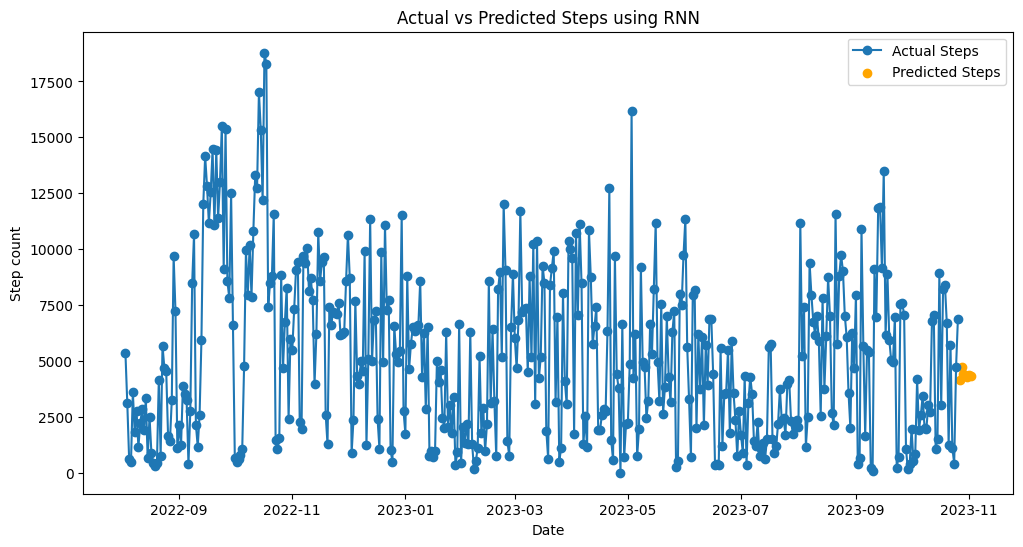

Predicted Steps for the Next 7 Days using RNN:
        Date  predicted_steps
0 2023-10-27      4157.954590
1 2023-10-28      4721.729004
2 2023-10-29      4426.007324
3 2023-10-30      4367.590332
4 2023-10-31      4298.777344
5 2023-11-01      4391.324219
6 2023-11-02      4339.516602


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

# Load data from the provided CSV file
df = pd.read_csv("Daily activity metrics.csv", parse_dates=['Date'])

# Extract the time series (Step count)
time_series = df['Step count'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
time_series_normalized = scaler.fit_transform(time_series)

# Create sequences for training
sequence_length = 5  # You can adjust this based on your preference
X, y = [], []

for i in range(len(time_series_normalized) - sequence_length):
    X.append(time_series_normalized[i:i + sequence_length, 0])
    y.append(time_series_normalized[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for RNN input (batch_size, timesteps, input_dim)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the specified RNN model
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Predict the next 7 days
future_data = []

# Use the last sequence from the test set to predict the next steps
current_sequence = X_test[-1].reshape(1, sequence_length, 1)

for _ in range(7):
    predicted_step_normalized = model.predict(current_sequence)[0, 0]
    future_data.append(predicted_step_normalized)
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, 0] = predicted_step_normalized

# Inverse transform to get the actual predicted steps
future_data = np.array(future_data)
future_data = scaler.inverse_transform(future_data.reshape(-1, 1))

# Create dates for the next 7 days
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=7, freq='D')
future_df = pd.DataFrame({'Date': future_dates, 'predicted_steps': future_data.flatten()})

# Visualize the actual and predicted steps
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Step count'], label='Actual Steps', linestyle='-', marker='o')
plt.scatter(future_df['Date'], future_df['predicted_steps'], label='Predicted Steps', marker='o', color='orange')
plt.title('Actual vs Predicted Steps using RNN')
plt.xlabel('Date')
plt.ylabel('Step count')
plt.legend()
plt.show()

# Print the predicted steps for the next 7 days
print("Predicted Steps for the Next 7 Days using RNN:")
print(future_df)
